# Kmeans Clustering
## Cluster lable를 구하면 기존 변수와 상관관계가 높아지게 되어 예측성능이 저하되기에 
## Cluset transform(거리)를 구해 (만약 cluster가 n개이면, 기존변수는 모두 버리고 n개의 변수(거리)로 예측)

In [4]:
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()
breast.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [9]:
import pandas as pd
data = pd.DataFrame(breast['data'], columns=breast['feature_names'])
data['class'] = breast['target']
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [10]:
X = data.drop(columns=['class'])
y = data['class']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=17)

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train).score(X_test, y_test)

0.965034965034965

In [12]:
y.value_counts()

1    357
0    212
Name: class, dtype: int64

In [17]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=17)
X_clusters = kmeans.fit_predict(X_train).reshape(-1, 1)
cluster = pd.DataFrame(X_clusters, columns=['분류군집'])
cluster.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,분류군집
0,1
1,1
2,0
3,1
4,1


In [23]:
cluster['실제군집'] = y_train
cluster['정답'] = cluster['실제군집'] - cluster['분류군집']
cluster.head()

,분류군집,실제군집,정답
0,1,0.0,-1.0
1,1,0.0,-1.0
2,0,0.0,0.0
3,1,0.0,-1.0
4,1,0.0,-1.0


In [25]:
cluster[cluster['정답'] == 0].head()

,분류군집,실제군집,정답
2,0,0.0,0.0
5,0,0.0,0.0
10,0,0.0,0.0
13,0,0.0,0.0
20,1,1.0,0.0


In [27]:
cluster['정답'].value_counts(normalize=True)

 0.0    0.572755
-1.0    0.318885
 1.0    0.108359
Name: 정답, dtype: float64

In [35]:
kmeans.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0], dtype=int32)

In [36]:
y_test

355    1
411    1
188    1
357    1
173    1
      ..
189    1
293    1
33     0
99     0
432    0
Name: class, Length: 143, dtype: int64

In [39]:
accuracy = kmeans.predict(X_test) == y_test
accuracy

355     True
411     True
188     True
357     True
173     True
       ...  
189     True
293     True
33      True
99     False
432     True
Name: class, Length: 143, dtype: bool

In [42]:
print(f'군집분석의 정확도 : {accuracy.sum()/len(y_test)}')

군집분석의 정확도 : 0.8951048951048951


<Axes: >

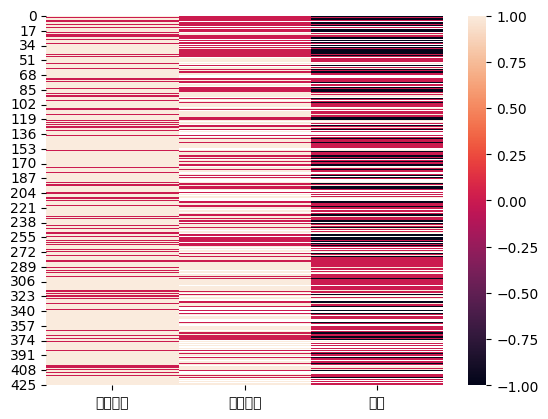

In [32]:
import warnings
warnings.filterwarnings(action='ignore')
import seaborn as sns
sns.heatmap(cluster)

In [ ]:
lgr.fit(np.hstack([X_train, X_clusters]), y_train)
lgr.score(np.hstack([X_test, kmeans.predict(X_test).reshape(-1, 1)]), y_test)

In [ ]:
X_clusters_distance = kmeans.fit_transform(X_train)
distance = ['군집1_거리', '군집2_거리', '군집3_거리']
pd.DataFrame(X_clusters_distance, columns=distance).head()
lgr.fit(np.hstack([X_train, X_clusters_distance]), y_train)
lgr.score(np.hstack([X_test, kmeans.transform(X_test)]), y_test)

,군집1_거리,군집2_거리,군집3_거리
0,460.810456,2856.187554,1492.436826
1,246.126672,2155.525148,788.934356
2,1193.675364,1275.165189,360.824967
3,177.948433,2578.850344,1211.961091
4,69.661908,2470.238122,1102.790002


LogisticRegression(random_state=0)

0.951048951048951

아마도 원래 데이터와 소속 군집의 무게중심과의 거리는 상관관계가 있다

In [ ]:
X_train

array([[8.219e+00, 2.070e+01, 5.327e+01, ..., 7.879e-02, 3.322e-01,
        1.486e-01],
       [1.396e+01, 1.705e+01, 9.143e+01, ..., 1.374e-01, 3.068e-01,
        7.957e-02],
       [1.550e+01, 2.108e+01, 1.029e+02, ..., 2.134e-01, 3.003e-01,
        1.048e-01],
       ...,
       [1.026e+01, 1.222e+01, 6.575e+01, ..., 6.696e-02, 2.937e-01,
        7.722e-02],
       [1.290e+01, 1.592e+01, 8.374e+01, ..., 1.012e-01, 3.549e-01,
        8.118e-02],
       [1.242e+01, 1.504e+01, 7.861e+01, ..., 4.052e-02, 2.901e-01,
        6.783e-02]])

In [ ]:
col_names = load_breast_cancer()['feature_names'].tolist() + distance
data = pd.DataFrame(np.hstack([X_train, X_clusters_distance]), columns=col_names)
data.iloc[:, 25:].head()

,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,군집1_거리,군집2_거리,군집3_거리
0,0.43100,0.538100,0.07879,0.3322,0.14860,460.810456,2856.187554,1492.436826
1,0.32620,0.320900,0.13740,0.3068,0.07957,246.126672,2155.525148,788.934356
2,0.40020,0.421100,0.21340,0.3003,0.10480,1193.675364,1275.165189,360.824967
3,0.07348,0.004955,0.01111,0.2758,0.06386,177.948433,2578.850344,1211.961091
4,0.08862,0.114500,0.07431,0.2694,0.06878,69.661908,2470.238122,1102.790002


<AxesSubplot:>

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5]),
 [Text(0.5, 0, 'mean radius'),
  Text(1.5, 0, 'mean texture'),
  Text(2.5, 0, 'mean perimeter'),
  Text(3.5, 0, 'mean area'),
  Text(4.5, 0, 'mean smoothness'),
  Text(5.5, 0, 'mean compactness'),
  Text(6.5, 0, 'mean concavity'),
  Text(7.5, 0, 'mean concave points'),
  Text(8.5, 0, 'mean symmetry'),
  Text(9.5, 0, 'mean fractal dimension'),
  Text(10.5, 0, 'radius error'),
  Text(11.5, 0, 'texture error'),
  Text(12.5, 0, 'perimeter error'),
  Text(13.5, 0, 'area error'),
  Text(14.5, 0, 'smoothness error'),
  Text(15.5, 0, 'compactness error'),
  Text(16.5, 0, 'concavity error'),
  Text(17.5, 0, 'concave points error'),
  Text(18.5, 0, 'symmetry error'),
  Text(19.5, 0, 'fractal dimension error'),
  Text(20.5, 0, 'worst radius'),
  Text(21.5, 0, 'worst texture'),

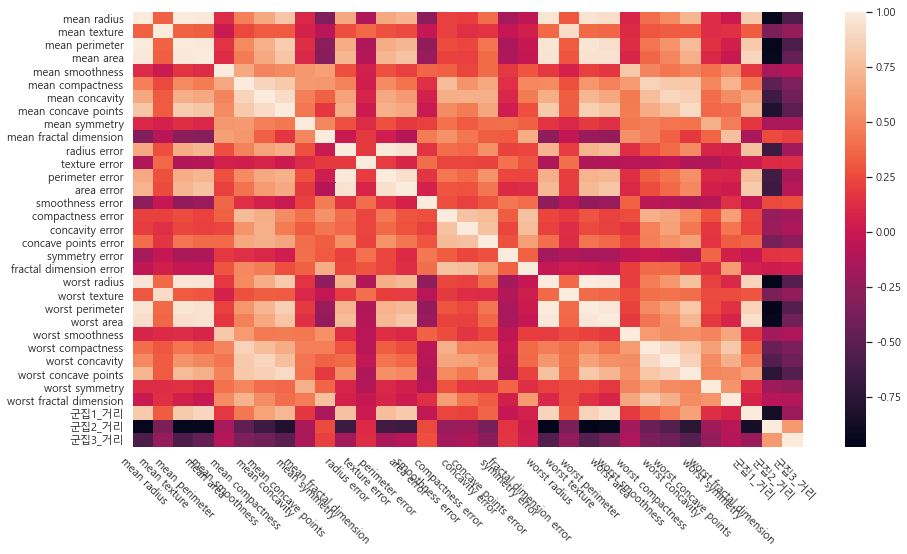

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글 표시
sns.heatmap(data.corr())
plt.xticks(rotation=-45)

Given that our new features are indeed correlated with some of the existing ones, what if we use only the distances to the cluster means as features, will it work then?

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=17)
X_clusters = kmeans.fit_transform(X_train)
pd.DataFrame(X_clusters).head()
lgr.fit(X_clusters, y_train)
lgr.score(kmeans.transform(X_test), y_test)

,0,1,2
0,460.810456,2856.187554,1492.436826
1,246.126672,2155.525148,788.934356
2,1193.675364,1275.165189,360.824967
3,177.948433,2578.850344,1211.961091
4,69.661908,2470.238122,1102.790002


LogisticRegression(random_state=0)

0.951048951048951

Much better. With this example, you can see that we can use K-Means as a way to do dimensionality reduction. Neat.

# End